In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [7]:
# Chemin vers les fichiers
data_dir = "C:/Users/hp/Desktop/ai/EMNLP_dataset"

with open(os.path.join(data_dir, "dialogues_text.txt"), "r", encoding="utf-8") as f:
    dialogues = [line.strip().split(" __eou__ ") for line in f]

with open(os.path.join(data_dir, "dialogues_emotion.txt"), "r", encoding="utf-8") as f:
    emotions = [list(map(int, line.strip().split())) for line in f]

with open(os.path.join(data_dir, "dialogues_act.txt"), "r", encoding="utf-8") as f:
    acts = [list(map(int, line.strip().split())) for line in f]

with open(os.path.join(data_dir, "dialogues_topic.txt"), "r", encoding="utf-8") as f:
    topics = [int(line.strip()) for line in f]

# Vérification des dimensions
assert len(dialogues) == len(emotions) == len(acts) == len(topics), "Les fichiers n'ont pas le même nombre de lignes !"

# Exemple d'une conversation
print("Exemple de dialogue :", dialogues[0])
print("Émotions associées :", emotions[0])
print("Actes associés :", acts[0])
print("Sujet associé :", topics[0])


Exemple de dialogue : ['The kitchen stinks .', "I'll throw out the garbage . __eou__"]
Émotions associées : [2, 0]
Actes associés : [3, 4]
Sujet associé : 1


C:\Users\hp\AppData\Local\Temp\ipykernel_14640\3133822884.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=emotion_counts, palette="coolwarm", order=emotion_labels.values())


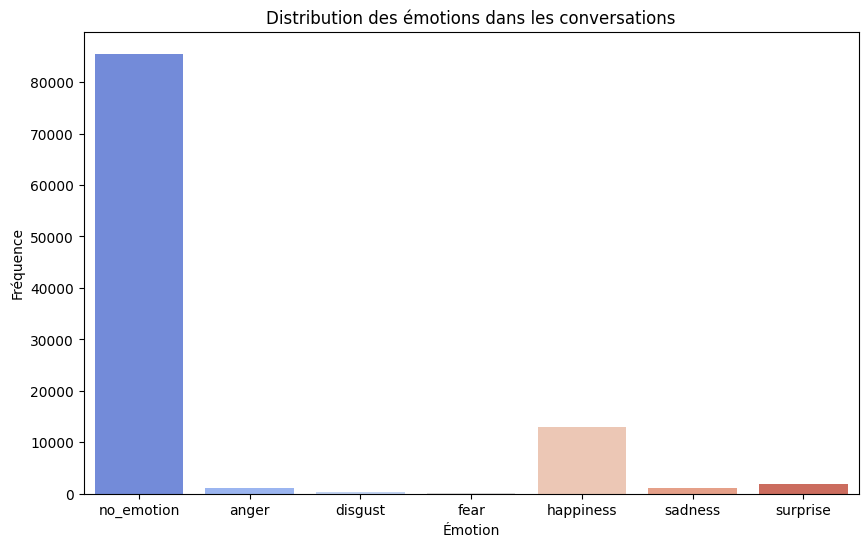

In [8]:
# Distribution des émotions
emotion_labels = {
    0: "no_emotion",
    1: "anger",
    2: "disgust",
    3: "fear",
    4: "happiness",
    5: "sadness",
    6: "surprise",
}

emotion_counts = pd.DataFrame([emotion for conv in emotions for emotion in conv], columns=["emotion"])
emotion_counts["label"] = emotion_counts["emotion"].map(emotion_labels)

plt.figure(figsize=(10, 6))
sns.countplot(x="label", data=emotion_counts, palette="coolwarm", order=emotion_labels.values())
plt.title("Distribution des émotions dans les conversations")
plt.xlabel("Émotion")
plt.ylabel("Fréquence")
plt.show()


In [9]:
# Fonction pour extraire les transitions d'émotions
def get_transitions(emotion_list):
    return [(emotion_list[i], emotion_list[i + 1]) for i in range(len(emotion_list) - 1)]

# Récupération des transitions
all_transitions = []
for conv in emotions:
    all_transitions.extend(get_transitions(conv))

# Compter les transitions fréquentes
transition_counts = Counter(all_transitions)

# Afficher les transitions les plus fréquentes
transition_df = pd.DataFrame(transition_counts.items(), columns=["Transition", "Count"]).sort_values(by="Count", ascending=False)
transition_df["Transition"] = transition_df["Transition"].apply(lambda x: f"{emotion_labels[x[0]]} -> {emotion_labels[x[1]]}")
print("Transitions les plus fréquentes :\n", transition_df.head(10))


Transitions les plus fréquentes :
                   Transition  Count
4   no_emotion -> no_emotion  67606
6     happiness -> happiness   5898
5    no_emotion -> happiness   5683
11   happiness -> no_emotion   3196
16    no_emotion -> surprise   1401
10    surprise -> no_emotion   1346
14     no_emotion -> sadness    887
15     sadness -> no_emotion    789
3        anger -> no_emotion    686
2        no_emotion -> anger    677


C:\Users\hp\AppData\Local\Temp\ipykernel_14640\3756170762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transition_df.head(10), x="Count", y="Transition", palette="viridis")


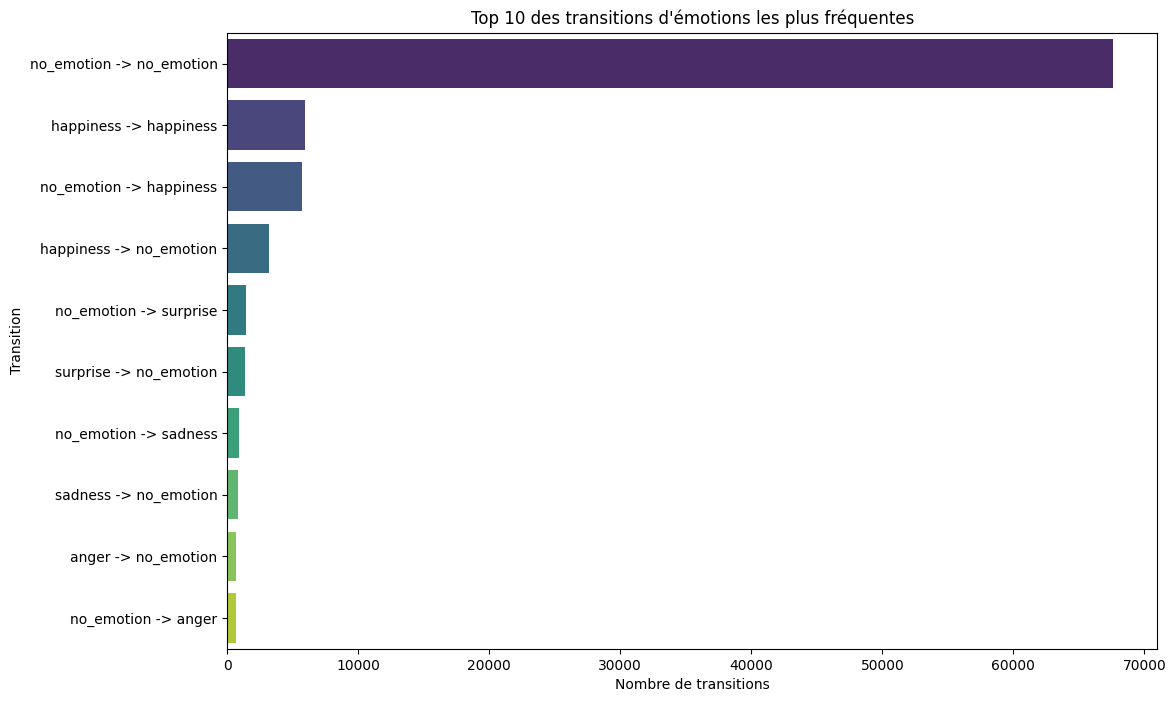

In [10]:
# Visualiser les transitions sous forme de graphique
plt.figure(figsize=(12, 8))
sns.barplot(data=transition_df.head(10), x="Count", y="Transition", palette="viridis")
plt.title("Top 10 des transitions d'émotions les plus fréquentes")
plt.xlabel("Nombre de transitions")
plt.ylabel("Transition")
plt.show()


Longueurs non correspondantes : conv=12, act_list=11, emotion_list=11


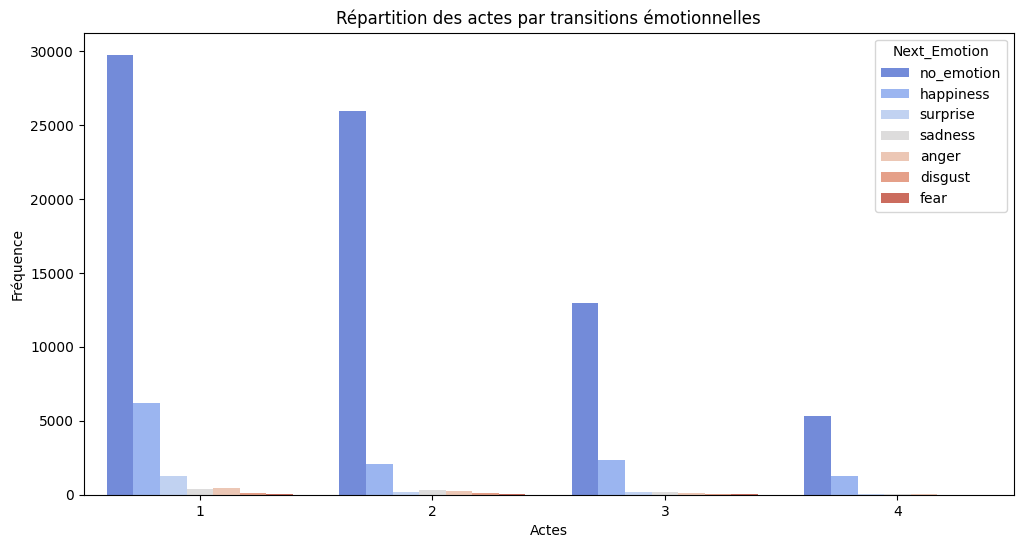

In [14]:
# Créer un DataFrame pour l'analyse
data = []

for conv, act_list, emotion_list, topic in zip(dialogues, acts, emotions, topics):
    # Vérifier que les longueurs correspondent
    if len(conv) == len(act_list) == len(emotion_list):
        for i in range(len(conv) - 1):  # -1 pour éviter l'accès hors limites
            data.append({
                "Dialogue": conv[i],
                "Act": act_list[i],
                "Emotion": emotion_labels[emotion_list[i]],
                "Next_Emotion": emotion_labels[emotion_list[i + 1]],
                "Topic": topic
            })
    else:
        print(f"Longueurs non correspondantes : conv={len(conv)}, act_list={len(act_list)}, emotion_list={len(emotion_list)}")

df = pd.DataFrame(data)

# Répartition des actes par transition émotionnelle
plt.figure(figsize=(12, 6))
sns.countplot(x="Act", hue="Next_Emotion", data=df, palette="coolwarm")
plt.title("Répartition des actes par transitions émotionnelles")
plt.xlabel("Actes")
plt.ylabel("Fréquence")
plt.show()


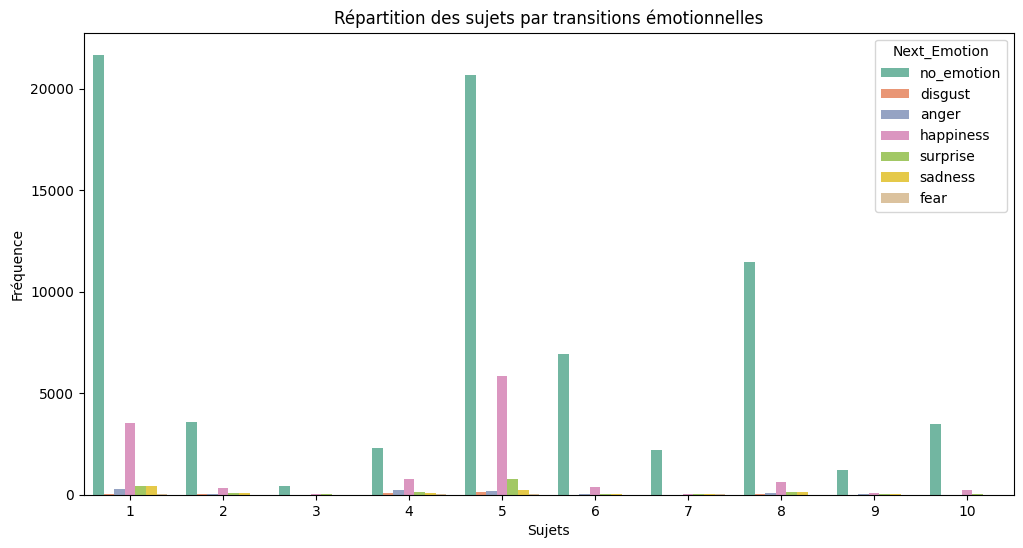

In [15]:
# Répartition des sujets par transition émotionnelle
plt.figure(figsize=(12, 6))
sns.countplot(x="Topic", hue="Next_Emotion", data=df, palette="Set2")
plt.title("Répartition des sujets par transitions émotionnelles")
plt.xlabel("Sujets")
plt.ylabel("Fréquence")
plt.show()


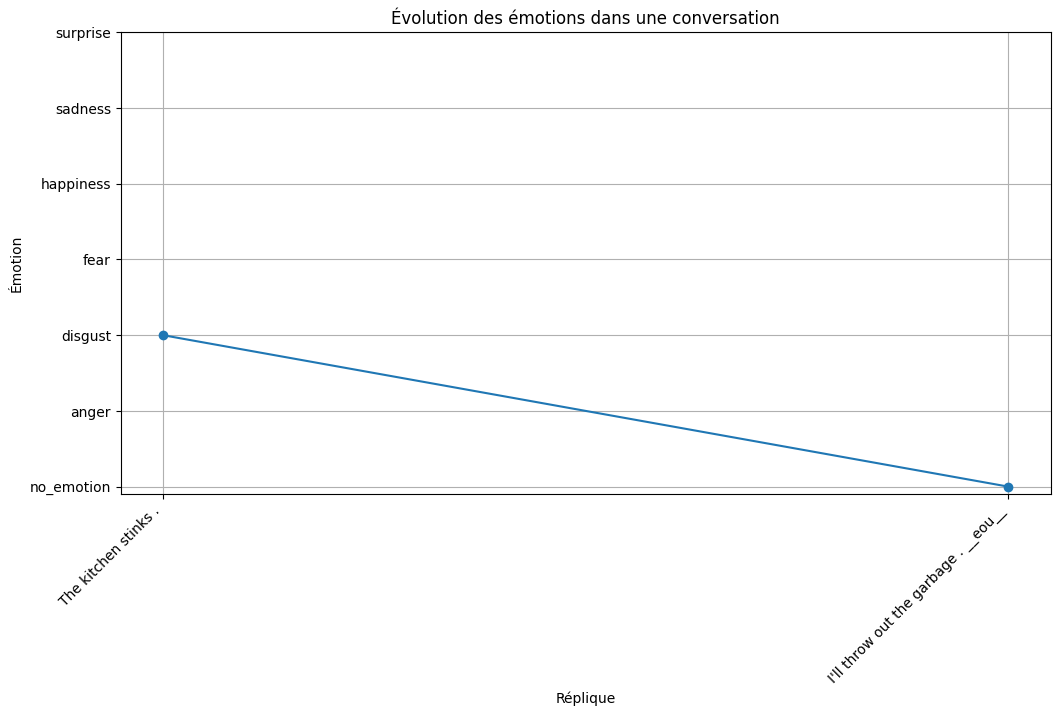

In [13]:
# Visualisation des émotions dans une conversation spécifique
def visualize_emotions(conversation_index):
    conv = dialogues[conversation_index]
    emotion_seq = emotions[conversation_index]
    emotion_seq_labels = [emotion_labels[e] for e in emotion_seq]

    plt.figure(figsize=(12, 6))
    plt.plot(range(len(emotion_seq)), emotion_seq, marker="o", label="Émotion")
    plt.xticks(range(len(conv)), conv, rotation=45, ha="right")
    plt.yticks(range(len(emotion_labels)), list(emotion_labels.values()))
    plt.title("Évolution des émotions dans une conversation")
    plt.xlabel("Réplique")
    plt.ylabel("Émotion")
    plt.grid()
    plt.show()

# Exemple
visualize_emotions(0)
